<a href="https://colab.research.google.com/github/SubhangiSati/Creating-a-Neural-Network/blob/main/NN_PROJECT_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 0.23010724244288172
Epoch 1000, Loss: 0.21621954594047899
Epoch 2000, Loss: 0.2041714957940132
Epoch 3000, Loss: 0.18115058109425144
Epoch 4000, Loss: 0.14296413158963991
Epoch 5000, Loss: 0.09934282317343078
Epoch 6000, Loss: 0.06449616019769155
Epoch 7000, Loss: 0.04226501876204447
Epoch 8000, Loss: 0.029095260679341605
Epoch 9000, Loss: 0.021163407948443083


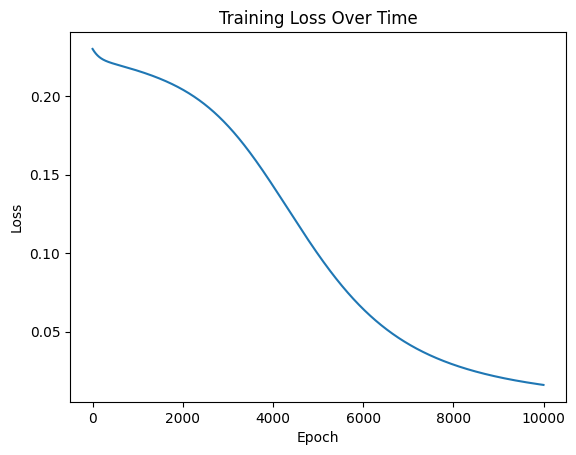

In [ ]:
#CREATE NEURAL NETWORK FROM SCRATCH
import numpy as np
import matplotlib.pyplot as plt



class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases with random values
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivative of the sigmoid function
        return x * (1 - x)

    def forward(self, input_data):
        # Forward pass through the network
        self.hidden_layer_input = np.dot(input_data, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_layer_input)
        return self.predicted_output

    def backward(self, input_data, target, learning_rate):
        # Backward pass through the network
        error = target - self.predicted_output
        output_delta = error * self.sigmoid_derivative(self.predicted_output)

        hidden_layer_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_layer_delta = hidden_layer_error * self.sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += input_data.T.dot(hidden_layer_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

    def train(self, input_data, target, epochs, learning_rate, visualize=True):
        losses = []
        for epoch in range(epochs):
            predicted_output = self.forward(input_data)
            self.backward(input_data, target, learning_rate)
            loss = np.mean(np.square(target - predicted_output))
            losses.append(loss)

            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

        if visualize:
            plt.plot(losses)
            plt.title('Training Loss Over Time')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.show()

# Example usage (unchanged)

input_size = 3
hidden_size = 4
output_size = 1

neural_network = NeuralNetwork(input_size, hidden_size, output_size)

input_data = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
target = np.array([[1], [1], [0]])

epochs = 10000
learning_rate = 0.01

neural_network.train(input_data, target, epochs, learning_rate)


In [ ]:
import pygame
import numpy as np

# Initialize Pygame
pygame.init()

# Constants
WIDTH, HEIGHT = 400, 400
GRID_SIZE = 20
FPS = 10

# Colors
WHITE = (255, 255, 255)
RED = (255, 0, 0)

# Neural Network Constants
input_size = 9  # 3x3 grid around the head of the snake
hidden_size = 10
output_size = 4  # Up, Down, Left, Right

# Neural Network
class NeuralNetwork:
    def __init__(self):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, input_data):
        hidden_layer_input = np.dot(input_data, self.weights_input_hidden) + self.bias_hidden
        hidden_layer_output = self.sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
        output = self.sigmoid(output_layer_input)
        return output

# Snake Class
class Snake:
    def __init__(self):
        self.body = [(100, 100), (90, 100), (80, 100)]
        self.direction = (1, 0)  # Initial direction: right

    def move(self):
        current_head = self.body[0]
        new_head = (current_head[0] + self.direction[0] * GRID_SIZE, current_head[1] + self.direction[1] * GRID_SIZE)
        self.body.insert(0, new_head)
        self.body.pop()

    def grow(self):
        tail_direction = (self.body[-2][0] - self.body[-1][0], self.body[-2][1] - self.body[-1][1])
        new_tail = (self.body[-1][0] + tail_direction[0], self.body[-1][1] + tail_direction[1])
        self.body.append(new_tail)

    def check_collision(self):
        if (
            self.body[0] in self.body[1:] or
            self.body[0][0] < 0 or self.body[0][0] >= WIDTH or
            self.body[0][1] < 0 or self.body[0][1] >= HEIGHT
        ):
            return True
        return False

    def check_eating(self, food_position):
        if self.body[0] == food_position:
            return True
        return False

# Game
class SnakeGame:
    def __init__(self):
        self.snake = Snake()
        self.food = self.generate_food()
        self.neural_network = NeuralNetwork()

    def generate_food(self):
        return (np.random.randint(0, WIDTH // GRID_SIZE) * GRID_SIZE, np.random.randint(0, HEIGHT // GRID_SIZE) * GRID_SIZE)

    def draw_snake(self):
        for segment in self.snake.body:
            pygame.draw.rect(screen, WHITE, (*segment, GRID_SIZE, GRID_SIZE))

    def draw_food(self):
        pygame.draw.rect(screen, RED, (*self.food, GRID_SIZE, GRID_SIZE))

    def run(self):
        clock = pygame.time.Clock()

        while True:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    quit()

            # Get input data for the neural network
            input_data = self.get_input_data()

            # Use the neural network to determine the direction
            direction = self.get_direction(input_data)

            # Update the snake direction
            self.snake.direction = direction

            # Move the snake
            self.snake.move()

            # Check for collisions
            if self.snake.check_collision():
                print("Game Over!")
                pygame.quit()
                quit()

            # Check if the snake ate the food
            if self.snake.check_eating(self.food):
                self.snake.grow()
                self.food = self.generate_food()

            # Draw the game
            screen.fill((0, 0, 0))
            self.draw_snake()
            self.draw_food()
            pygame.display.update()

            clock.tick(FPS)

    def get_input_data(self):
        head_x, head_y = self.snake.body[0]
        food_x, food_y = self.food

        # Relative positions: food to the left, right, up, down of the head
        relative_positions = [
            int(food_x < head_x),  # Food to the left
            int(food_x > head_x),  # Food to the right
            int(food_y < head_y),  # Food above
            int(food_y > head_y),  # Food below
            int(food_x < head_x and food_y < head_y),  # Food diagonally up-left
            int(food_x < head_x and food_y > head_y),  # Food diagonally down-left
            int(food_x > head_x and food_y < head_y),  # Food diagonally up-right
            int(food_x > head_x and food_y > head_y),  # Food diagonally down-right
            1  # Bias term
        ]

        return np.array(relative_positions)

    def get_direction(self, input_data):
        # Use the neural network to determine the direction
        output = self.neural_network.forward(input_data)

        # Convert output to a valid direction
        max_index = np.argmax(output)
        if max_index == 0 and self.snake.direction != (1, 0):  # Left
            return (-1, 0)
        elif max_index == 1 and self.snake.direction != (-1, 0):  # Right
            return (1, 0)
        elif max_index == 2 and self.snake.direction != (0, 1):  # Up
            return (0, -1)
        elif max_index == 3 and self.snake.direction != (0, -1):  # Down
            return (0, 1)
        else:
            return self.snake.direction

# Run the game
if __name__ == "__main__":
    screen = pygame.display.set_mode((WIDTH, HEIGHT))
    pygame.display.set_caption("Snake Game with Neural Network")

    game = SnakeGame()
    game.run()


pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
Game Over!


error: ignored

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.biases_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.biases_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        # Forward propagation
        self.hidden_layer_activation = np.dot(inputs, self.weights_input_hidden) + self.biases_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_activation)

        self.output_layer_activation = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.biases_output
        self.predicted_output = self.sigmoid(self.output_layer_activation)

        return self.predicted_output

    def backward(self, inputs, targets, learning_rate):
        # Backward propagation
        output_error = targets - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        hidden_layer_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_layer_delta = hidden_layer_error * self.sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.biases_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden += inputs.T.dot(hidden_layer_delta) * learning_rate
        self.biases_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

    def train(self, training_data, targets, epochs, learning_rate):
        for epoch in range(epochs):
            for i in range(len(training_data)):
                inputs = training_data[i]
                target = targets[i]

                # Convert inputs and target to numpy arrays
                inputs = np.array([inputs])
                target = np.array([target])

                # Forward and backward pass
                self.forward(inputs)
                self.backward(inputs, target, learning_rate)

                # Print the error for every 1000 epochs
                if epoch % 1000 == 0:
                    error = np.mean(np.abs(target - self.predicted_output))
                    print(f'Epoch: {epoch}, Error: {error}')

# Example usage:
# Suppose you have a word game where each letter corresponds to a numerical value (e.g., A=1, B=2, ..., Z=26).
# Your training data could be the input representations of words, and the targets could be the numerical values of those words.

# Sample training data (word representations)
training_data = [
    [1, 2, 3, 4],   # Example: "ABCD"
    [5, 6, 7, 8],   # Example: "EFGH"
    # Add more training data as needed
]

# Corresponding targets (numerical values of words)
targets = [
    [10],   # Example: Numeric value of "ABCD"
    [26],   # Example: Numeric value of "EFGH"
    # Add more targets as needed
]

# Initialize the neural network
input_size = len(training_data[0])
hidden_size = 4
output_size = 1
learning_rate = 0.01
epochs = 10000

# Create the neural network
word_game_ai = NeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network
word_game_ai.train(training_data, targets, epochs, learning_rate)

# Test the trained neural network
test_input = [1, 2, 3, 4]  # Example: Test input for the word "ABCD"
predicted_value = word_game_ai.forward(np.array([test_input]))
print(f'Test Input: {test_input}, Predicted Value: {predicted_value}')



Epoch: 0, Error: 9.082408260669075
Epoch: 0, Error: 25.07838416574054
Epoch: 1000, Error: 9.00062256351745
Epoch: 1000, Error: 25.000577898235512
Epoch: 2000, Error: 9.000312447026843
Epoch: 2000, Error: 25.000289056747942
Epoch: 3000, Error: 9.000208590879279
Epoch: 3000, Error: 25.000192660614154
Epoch: 4000, Error: 9.000156562702575
Epoch: 4000, Error: 25.00014445880819
Epoch: 5000, Error: 9.000125311284332
Epoch: 5000, Error: 25.000115541037825
Epoch: 6000, Error: 9.000104461729622
Epoch: 6000, Error: 25.000096265533603
Epoch: 7000, Error: 9.000089561319912
Epoch: 7000, Error: 25.00008249951039
Epoch: 8000, Error: 9.000078381517802
Epoch: 8000, Error: 25.000072176556294
Epoch: 9000, Error: 9.000069683350414
Epoch: 9000, Error: 25.000064148719954
Test Input: [1, 2, 3, 4], Predicted Value: [[0.99993728]]


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.biases_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.biases_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        # Forward propagation
        self.hidden_layer_activation = np.dot(inputs, self.weights_input_hidden) + self.biases_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_activation)

        self.output_layer_activation = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.biases_output
        self.predicted_output = self.sigmoid(self.output_layer_activation)

        return self.predicted_output

    def backward(self, inputs, targets, learning_rate):
        # Backward propagation
        output_error = targets - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        hidden_layer_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_layer_delta = hidden_layer_error * self.sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.biases_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden += inputs.T.dot(hidden_layer_delta) * learning_rate
        self.biases_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

    def train(self, training_data, targets, epochs, learning_rate):
        for epoch in range(epochs):
            for i in range(len(training_data)):
                inputs = training_data[i]
                target = targets[i]

                # Convert inputs and target to numpy arrays
                inputs = np.array([inputs])
                target = np.array([target])

                # Forward and backward pass
                self.forward(inputs)
                self.backward(inputs, target, learning_rate)

                # Print the error for every 1000 epochs
                if epoch % 1000 == 0:
                    error = np.mean(np.abs(target - self.predicted_output))
                    print(f'Epoch: {epoch}, Error: {error}')


# Initialize the neural network
input_size = X_train.shape[1]
hidden_size = 8
output_size = y_train.shape[1]
learning_rate = 0.01
epochs = 5000

# Create the neural network
iris_nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network
iris_nn.train(X_train, y_train, epochs, learning_rate)

# Test the trained neural network
correct_predictions = 0
for i in range(len(X_test)):
    test_input = X_test[i]
    true_label = y_test[i]

    # Forward pass
    predicted_label = iris_nn.forward(np.array([test_input]))

    # Convert one-hot encoded labels to class index
    predicted_class = np.argmax(predicted_label)
    true_class = np.argmax(true_label)

    # Check if prediction is correct
    if predicted_class == true_class:
        correct_predictions += 1

accuracy = correct_predictions / len(X_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch: 0, Error: 0.6625358678262795
Epoch: 0, Error: 0.6627074059062826
Epoch: 0, Error: 0.6652224114153545
Epoch: 0, Error: 0.662597284911961
Epoch: 0, Error: 0.6625100298565991
Epoch: 0, Error: 0.6587541738311539
Epoch: 0, Error: 0.6652297161518699
Epoch: 0, Error: 0.6625837744420714
Epoch: 0, Error: 0.6625582366651621
Epoch: 0, Error: 0.6625668523226881
Epoch: 0, Error: 0.6587166138018727
Epoch: 0, Error: 0.6652452005752356
Epoch: 0, Error: 0.6652394435192516
Epoch: 0, Error: 0.6626027659153609
Epoch: 0, Error: 0.6625578748870159
Epoch: 0, Error: 0.6652714359426772
Epoch: 0, Error: 0.6586498066617814
Epoch: 0, Error: 0.6586698542351038
Epoch: 0, Error: 0.6652502176713777
Epoch: 0, Error: 0.6586902810948447
Epoch: 0, Error: 0.6652490629585572
Epoch: 0, Error: 0.6586631026819149
Epoch: 0, Error: 0.6652368663485756
Epoch: 0, Error: 0.6625170797460934
Epoch: 0, Error: 0.6586338204037623
Epoch: 0, Error: 0.6652593535979965
Epoch: 0, Error: 0.6625040986959047
Epoch: 0, Error: 0.6625017178

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch: 0, Error: 0.62659493594114
Epoch: 100, Error: 0.3340117625651537
Epoch: 200, Error: 0.23327689016618378
Epoch: 300, Error: 0.15283139902587273
Epoch: 400, Error: 0.11105328840206469
Epoch: 500, Error: 0.08810269450708258
Epoch: 600, Error: 0.07399306427558862
Epoch: 700, Error: 0.06439786020846318
Epoch: 800, Error: 0.057276013878558456
Epoch: 900, Error: 0.05186494389112908
Epoch: 1000, Error: 0.04775387413223822
Epoch: 1100, Error: 0.044552562272482554
Epoch: 1200, Error: 0.04198322234534276
Epoch: 1300, Error: 0.03986957857348355
Epoch: 1400, Error: 0.03809727830602853
Epoch: 1500, Error: 0.03658847161834588
Epoch: 1600, Error: 0.03528790255058478
Epoch: 1700, Error: 0.034155078796173244
Epoch: 1800, Error: 0.03315957813343986
Epoch: 1900, Error: 0.03227807243811342
Epoch: 2000, Error: 0.03149235826318789
Epoch: 2100, Error: 0.030788011168128442
Epoch: 2200, Error: 0.030153443089841348
Epoch: 2300, Error: 0.029579228425601057
Epoch: 2400, Error: 0.02905761369306664
Epoch: 250

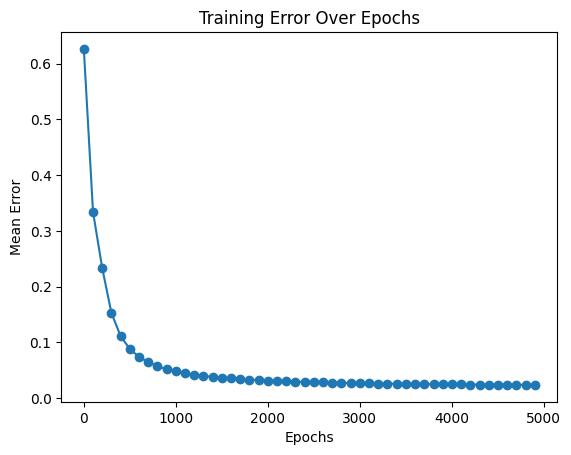

Test Accuracy: 96.67%


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.biases_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.biases_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        # Forward propagation
        self.hidden_layer_activation = np.dot(inputs, self.weights_input_hidden) + self.biases_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_activation)

        self.output_layer_activation = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.biases_output
        self.predicted_output = self.sigmoid(self.output_layer_activation)

        return self.predicted_output

    def backward(self, inputs, targets, learning_rate):
        # Backward propagation
        output_error = targets - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        hidden_layer_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_layer_delta = hidden_layer_error * self.sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.biases_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden += inputs.T.dot(hidden_layer_delta) * learning_rate
        self.biases_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

    def train(self, training_data, targets, epochs, learning_rate):
        errors = []  # List to store errors for plotting

        for epoch in range(epochs):
            for i in range(len(training_data)):
                inputs = training_data[i]
                target = targets[i]

                # Convert inputs and target to numpy arrays
                inputs = np.array([inputs])
                target = np.array([target])

                # Forward and backward pass
                self.forward(inputs)
                self.backward(inputs, target, learning_rate)

            # Calculate and store the mean error for this epoch
            if epoch % 100 == 0:
                error = np.mean(np.abs(target - self.predicted_output))
                errors.append(error)

                print(f'Epoch: {epoch}, Error: {error}')

        # Plot the training error over epochs
        plt.plot(range(0, epochs, 100), errors, marker='o', linestyle='-')
        plt.title('Training Error Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Mean Error')
        plt.show()

# Initialize the neural network
input_size = X_train.shape[1]
hidden_size = 8
output_size = y_train.shape[1]
learning_rate = 0.01
epochs = 5000

# Create the neural network
iris_nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network
iris_nn.train(X_train, y_train, epochs, learning_rate)

# Test the trained neural network
correct_predictions = 0
for i in range(len(X_test)):
    test_input = X_test[i]
    true_label = y_test[i]

    # Forward pass
    predicted_label = iris_nn.forward(np.array([test_input]))

    # Convert one-hot encoded labels to class index
    predicted_class = np.argmax(predicted_label)
    true_class = np.argmax(true_label)

    # Check if prediction is correct
    if predicted_class == true_class:
        correct_predictions += 1

accuracy = correct_predictions / len(X_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Stroke Prediction dataset
# Replace 'stroke_data.csv' with the actual file path of your dataset
stroke_data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# Preprocess the data
# For simplicity, let's drop the 'id' column and handle missing values
stroke_data = stroke_data.drop('id', axis=1)
stroke_data = stroke_data.dropna()

# Convert categorical variables to one-hot encoding
stroke_data = pd.get_dummies(stroke_data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Extract features and labels
X = stroke_data.drop('stroke', axis=1).values
y = stroke_data['stroke'].values.reshape(-1, 1)

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Input to hidden layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)

        # Hidden to output layer
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = self.sigmoid(self.final_input)

        return self.final_output

    def backward(self, X, y, output, learning_rate=0.01):
        # Calculate the loss
        loss = y - output

        # Output layer
        output_error = loss * self.sigmoid_derivative(output)
        d_weights_hidden_output = np.dot(self.hidden_output.T, output_error)
        d_bias_output = np.sum(output_error, axis=0, keepdims=True)

        # Hidden layer
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * self.sigmoid_derivative(self.hidden_output)
        d_weights_input_hidden = np.dot(X.T, hidden_error)
        d_bias_hidden = np.sum(hidden_error, axis=0, keepdims=True)

        # Update weights and biases
        self.weights_input_hidden += learning_rate * d_weights_input_hidden
        self.bias_hidden += learning_rate * d_bias_hidden
        self.weights_hidden_output += learning_rate * d_weights_hidden_output
        self.bias_output += learning_rate * d_bias_output

    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Backward pass
            self.backward(X, y, output)

            # Print the loss every 100 epochs
            if epoch % 100 == 0:
                loss = np.mean(np.abs(y - output))
                print(f"Epoch {epoch}, Loss: {loss}")

# Instantiate the neural network
input_size = X_train.shape[1]
hidden_size = 8
output_size = 1
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network
nn.train(X_train, y_train, epochs=1000)

# Test the neural network
test_output = nn.forward(X_test)
test_predictions = (test_output > 0.5).astype(int)

# Evaluate the performance
accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {accuracy}")


Epoch 0, Loss: 0.7217249844559251
Epoch 100, Loss: 0.039805221739812754
Epoch 200, Loss: 0.03980749917067605
Epoch 300, Loss: 0.03980991880036546
Epoch 400, Loss: 0.03981249435844081
Epoch 500, Loss: 0.03981524139520906
Epoch 600, Loss: 0.03981817759337853
Epoch 700, Loss: 0.03982132314590268
Epoch 800, Loss: 0.03982470121698904
Epoch 900, Loss: 0.039828338508406405
Test Accuracy: 0.9460285132382892


Epoch 0, Loss: 0.3941387139786123
Epoch 100, Loss: 0.04022661789498723
Epoch 200, Loss: 0.04042095225936576
Epoch 300, Loss: 0.04096358966421059
Epoch 400, Loss: 0.04362873935352549
Epoch 500, Loss: 0.060729360415668045
Epoch 600, Loss: 0.06832534621847813
Epoch 700, Loss: 0.06804886899896835
Epoch 800, Loss: 0.06749908310505262
Epoch 900, Loss: 0.0662487271023835


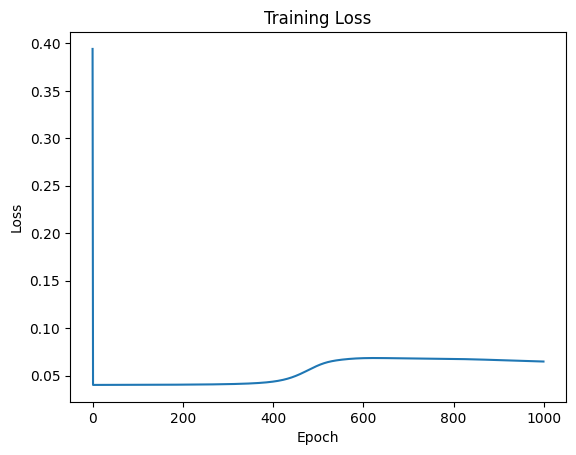

Test Accuracy: 0.9460285132382892


In [ ]:
"""the code is building and training a basic neural network from scratch
for binary classification on the Stroke Prediction dataset.
The training loss is visualized,
and the accuracy on the test set is reported as a measure of the model's performance"""
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Stroke Prediction dataset
# Replace 'stroke_data.csv' with the actual file path of your dataset
stroke_data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

# Preprocess the data
# For simplicity, let's drop the 'id' column and handle missing values
stroke_data = stroke_data.drop('id', axis=1)
stroke_data = stroke_data.dropna()

# Convert categorical variables to one-hot encoding
stroke_data = pd.get_dummies(stroke_data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Extract features and labels
X = stroke_data.drop('stroke', axis=1).values
y = stroke_data['stroke'].values.reshape(-1, 1)

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Input to hidden layer
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)

        # Hidden to output layer
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = self.sigmoid(self.final_input)

        return self.final_output

    def backward(self, X, y, output, learning_rate=0.01):
        # Calculate the loss
        loss = y - output

        # Output layer
        output_error = loss * self.sigmoid_derivative(output)
        d_weights_hidden_output = np.dot(self.hidden_output.T, output_error)
        d_bias_output = np.sum(output_error, axis=0, keepdims=True)

        # Hidden layer
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * self.sigmoid_derivative(self.hidden_output)
        d_weights_input_hidden = np.dot(X.T, hidden_error)
        d_bias_hidden = np.sum(hidden_error, axis=0, keepdims=True)

        # Update weights and biases
        self.weights_input_hidden += learning_rate * d_weights_input_hidden
        self.bias_hidden += learning_rate * d_bias_hidden
        self.weights_hidden_output += learning_rate * d_weights_hidden_output
        self.bias_output += learning_rate * d_bias_output

    def train(self, X, y, epochs=1000):
        losses = []  # Store training losses for visualization
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Backward pass
            self.backward(X, y, output)

            # Calculate and store the loss
            loss = np.mean(np.abs(y - output))
            losses.append(loss)

            # Print the loss every 100 epochs
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

        # Plot the training loss
        plt.plot(losses)
        plt.title('Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()

# Instantiate the neural network
input_size = X_train.shape[1]
hidden_size = 8
output_size = 1
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network
nn.train(X_train, y_train, epochs=1000)

# Test the neural network
test_output = nn.forward(X_test)
test_predictions = (test_output > 0.5).astype(int)

# Evaluate the performance
accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {accuracy}")
